## Deep Learning with ConvNets

In [9]:
import keras
print(keras.__version__)

# upgraded keras to 2.0.4
# pip install --upgrade keras

2.0.4


## Convolution Neural Network Code - CIFAR 10 Dataset

In [1]:
from keras import backend as k
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D, Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.datasets import mnist,cifar10
from keras.optimizers import RMSprop, Adam, SGD
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
%matplotlib inline

Using Theano backend.


In [2]:
# Repititive steps as last time for training the model

OPTIMIZER = RMSprop()
NB_EPOCHS = 20   # decreasing the number of epochs to reduce the time for MLP, also for the RMSPROP and ADAM optimizers
SPLIT_PARAM = 0.2
NB_CLASSES = 10
VERBOSE =1
BATCH_SIZE = 128
DROPOUT_RATE = 0.25
NB_ROW, NB_COLS = 32, 32
NB_CHANNELS = 3
INPUT_SHAPE = (NB_ROW,NB_COLS, NB_CHANNELS)
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
#k.set_image_dim_ordering("th")

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalize the data
X_train /= 255
X_test /= 255

print(Y_train[0])

#convert labels to a one hot encoding vector
train_labels = np_utils.to_categorical(Y_train, NB_CLASSES)
test_labels = np_utils.to_categorical(Y_test, NB_CLASSES)

print(X_train.shape)
print(X_test.shape)

print(train_labels[0])

[6]
(50000, 32, 32, 3)
(10000, 32, 32, 3)
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


### Define the Convnet model for CIFAR 10 dataset

In [6]:
#Define the Convnet model for CIFAR 10 dataset
model = Sequential()
#1st layer conv -> relu -> pooling
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(DROPOUT_RATE))
# 3rd layer - for flattening the output and pass through the softmax
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
__________

In [8]:
# Compile the Model , and train and test
model.compile(optimizer=OPTIMIZER, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=VERBOSE, 
                    validation_split=SPLIT_PARAM)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 94s - loss: 1.6762 - acc: 0.4091 - val_loss: 1.4308 - val_acc: 0.4761
Epoch 2/20
40000/40000 [==============================] - 95s - loss: 1.3106 - acc: 0.5363 - val_loss: 1.4679 - val_acc: 0.4681
Epoch 3/20
40000/40000 [==============================] - 130s - loss: 1.1684 - acc: 0.5910 - val_loss: 1.3165 - val_acc: 0.5401
Epoch 4/20
40000/40000 [==============================] - 140s - loss: 1.0734 - acc: 0.6237 - val_loss: 1.1226 - val_acc: 0.6066
Epoch 5/20
40000/40000 [==============================] - 142s - loss: 0.9872 - acc: 0.6555 - val_loss: 1.0861 - val_acc: 0.6181
Epoch 6/20
40000/40000 [==============================] - 139s - loss: 0.9085 - acc: 0.6807 - val_loss: 1.0838 - val_acc: 0.6329
Epoch 7/20
40000/40000 [==============================] - 144s - loss: 0.8410 - acc: 0.7050 - val_loss: 1.0713 - val_acc: 0.6385
Epoch 8/20
40000/40000 [=========================

 9952/10000 [============================>.] - ETA: 0sTest Score:  1.28646185226
Test Accuracy:  0.6589
dict_keys(['loss', 'acc', 'val_acc', 'val_loss'])


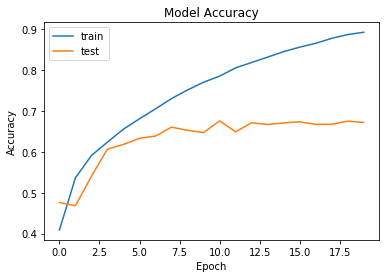

In [10]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

#list all data in history
print(history.history.keys())

#Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

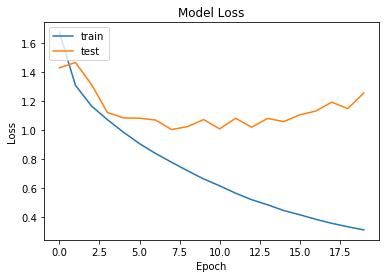

In [11]:
#Summarize history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
#Saving the model json and the weights of the trainer model
model_json = model.to_json()
open('/Users/tkmacl9/Desktop/FastAIDLCourse/nbs/KerasDeepLearning/cifar_10_1.json', 'w').write(model_json)
# save the weights 
model.save_weights('/Users/tkmacl9/Desktop/FastAIDLCourse/nbs/KerasDeepLearning/cifar_10_1_weights.h5', overwrite=True)

### Making the Model deeper by adding more layers to improve the performance of CIFAR 10 , conv -> conv -> maxpool -> dropout 

In [8]:
model = Sequential()
# 1st layer of the DNN
model.add(Conv2D(32, (3,3), padding='same', input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(DROPOUT_RATE))

# 2nd layer of the DNN
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(DROPOUT_RATE))

# Final dense layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [14]:
model.compile(optimizer=OPTIMIZER, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=VERBOSE, 
                    validation_split=SPLIT_PARAM)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 315s - loss: 1.7987 - acc: 0.3533 - val_loss: 1.4821 - val_acc: 0.4668
Epoch 2/20
40000/40000 [==============================] - 305s - loss: 1.2864 - acc: 0.5411 - val_loss: 1.1121 - val_acc: 0.5990
Epoch 3/20
40000/40000 [==============================] - 323s - loss: 1.0478 - acc: 0.6294 - val_loss: 1.0310 - val_acc: 0.6339
Epoch 4/20
40000/40000 [==============================] - 353s - loss: 0.8953 - acc: 0.6863 - val_loss: 0.8991 - val_acc: 0.6844
Epoch 5/20
40000/40000 [==============================] - 338s - loss: 0.7794 - acc: 0.7281 - val_loss: 0.8046 - val_acc: 0.7227
Epoch 6/20
40000/40000 [==============================] - 333s - loss: 0.6933 - acc: 0.7603 - val_loss: 0.8940 - val_acc: 0.6936
Epoch 7/20
40000/40000 [==============================] - 330s - loss: 0.6118 - acc: 0.7870 - val_loss: 0.8904 - val_acc: 0.7040
Epoch 8/20
40000/40000 [=======================

 9984/10000 [============================>.] - ETA: 0sTest Score:  1.08187987537
Test Accuracy:  0.7774
dict_keys(['loss', 'acc', 'val_acc', 'val_loss'])


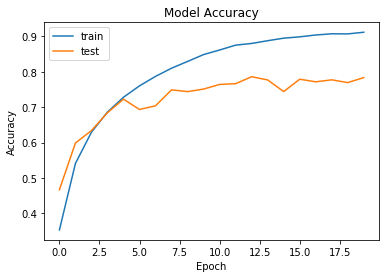

In [15]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

#list all data in history
print(history.history.keys())

#Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

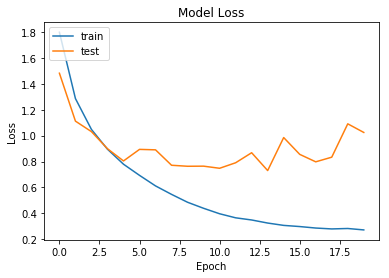

In [16]:
#Summarize history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
#Saving the model json and the weights of the trainer model
model_json = model.to_json()
open('/Users/tkmacl9/Desktop/FastAIDLCourse/nbs/KerasDeepLearning/cifar_10_new_imgs.json', 'w').write(model_json)
# save the weights 
model.save_weights('/Users/tkmacl9/Desktop/FastAIDLCourse/nbs/KerasDeepLearning/cifar_10_new_imgs_weights.h5', overwrite=True)